In [10]:
#### creacion de autoencoder para la detección de los outliers
### tratamiento de los datos
import numpy as np
import pandas as pd
from mat4py import loadmat
### graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use("ggplot") or plt.style.use("ggplot")

## preprocesado y modelado
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

import warnings
warnings.filterwarnings("ignore")





In [12]:
cardio = loadmat(filename= "cardio.mat")

In [14]:
datos_X = pd.DataFrame(cardio["X"])
datos_X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.208514,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,-0.418356,-0.919988,-0.161178,0.829564,0.953023,-0.061401,3.060819,1.221178,1.338133,-0.420487,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.982928,-2.616202,-1.561651,0.244620,-0.493294
1827,-0.418356,-0.919988,-0.171055,0.796630,0.823510,-0.061401,3.565299,1.281003,1.453945,-0.420487,...,1.459497,-0.976561,1.524719,-0.065382,-0.488279,-1.862696,-2.807747,-1.699585,0.010817,-0.493294
1828,-0.418356,-0.919988,-0.164635,0.952396,1.120470,-0.061401,2.788995,1.221178,1.222321,-0.420487,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.922812,-2.488506,-1.492683,0.244620,-0.493294
1829,-0.418356,-0.919988,-0.150934,0.695726,1.212428,-0.061401,2.484822,1.221178,1.222321,-0.420487,...,1.459497,-0.976561,1.524719,0.278625,-0.488279,-1.321656,-2.296962,-1.423716,0.144419,-0.493294


In [15]:
datos_X.columns = ["columna_"+str(i) for i in datos_X.columns]

In [16]:
datos_X

,columna_0,columna_1,columna_2,columna_3,columna_4,columna_5,columna_6,columna_7,columna_8,columna_9,...,columna_11,columna_12,columna_13,columna_14,columna_15,columna_16,columna_17,columna_18,columna_19,columna_20
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.208514,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,-0.418356,-0.919988,-0.161178,0.829564,0.953023,-0.061401,3.060819,1.221178,1.338133,-0.420487,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.982928,-2.616202,-1.561651,0.244620,-0.493294
1827,-0.418356,-0.919988,-0.171055,0.796630,0.823510,-0.061401,3.565299,1.281003,1.453945,-0.420487,...,1.459497,-0.976561,1.524719,-0.065382,-0.488279,-1.862696,-2.807747,-1.699585,0.010817,-0.493294
1828,-0.418356,-0.919988,-0.164635,0.952396,1.120470,-0.061401,2.788995,1.221178,1.222321,-0.420487,...,1.459497,-0.976561,1.524719,0.622631,-0.488279,-1.922812,-2.488506,-1.492683,0.244620,-0.493294
1829,-0.418356,-0.919988,-0.150934,0.695726,1.212428,-0.061401,2.484822,1.221178,1.222321,-0.420487,...,1.459497,-0.976561,1.524719,0.278625,-0.488279,-1.321656,-2.296962,-1.423716,0.144419,-0.493294


In [18]:
## variable independiente que clasifica el tipo de dato
## si es un outliers o inliers
datos_y = pd.DataFrame(cardio["y"], columns = ["y"])


In [19]:
datos = pd.concat((datos_X, datos_y), axis = 1)

In [20]:
datos

,columna_0,columna_1,columna_2,columna_3,columna_4,columna_5,columna_6,columna_7,columna_8,columna_9,...,columna_12,columna_13,columna_14,columna_15,columna_16,columna_17,columna_18,columna_19,columna_20,y
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,0.0
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294,0.0
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018,0.0
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018,0.0
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,-0.418356,-0.919988,-0.161178,0.829564,0.953023,-0.061401,3.060819,1.221178,1.338133,-0.420487,...,-0.976561,1.524719,0.622631,-0.488279,-1.982928,-2.616202,-1.561651,0.244620,-0.493294,1.0
1827,-0.418356,-0.919988,-0.171055,0.796630,0.823510,-0.061401,3.565299,1.281003,1.453945,-0.420487,...,-0.976561,1.524719,-0.065382,-0.488279,-1.862696,-2.807747,-1.699585,0.010817,-0.493294,1.0
1828,-0.418356,-0.919988,-0.164635,0.952396,1.120470,-0.061401,2.788995,1.221178,1.222321,-0.420487,...,-0.976561,1.524719,0.622631,-0.488279,-1.922812,-2.488506,-1.492683,0.244620,-0.493294,1.0
1829,-0.418356,-0.919988,-0.150934,0.695726,1.212428,-0.061401,2.484822,1.221178,1.222321,-0.420487,...,-0.976561,1.524719,0.278625,-0.488279,-1.321656,-2.296962,-1.423716,0.144419,-0.493294,1.0


In [21]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   columna_0   1831 non-null   float64
 1   columna_1   1831 non-null   float64
 2   columna_2   1831 non-null   float64
 3   columna_3   1831 non-null   float64
 4   columna_4   1831 non-null   float64
 5   columna_5   1831 non-null   float64
 6   columna_6   1831 non-null   float64
 7   columna_7   1831 non-null   float64
 8   columna_8   1831 non-null   float64
 9   columna_9   1831 non-null   float64
 10  columna_10  1831 non-null   float64
 11  columna_11  1831 non-null   float64
 12  columna_12  1831 non-null   float64
 13  columna_13  1831 non-null   float64
 14  columna_14  1831 non-null   float64
 15  columna_15  1831 non-null   float64
 16  columna_16  1831 non-null   float64
 17  columna_17  1831 non-null   float64
 18  columna_18  1831 non-null   float64
 19  columna_19  1831 non-null  

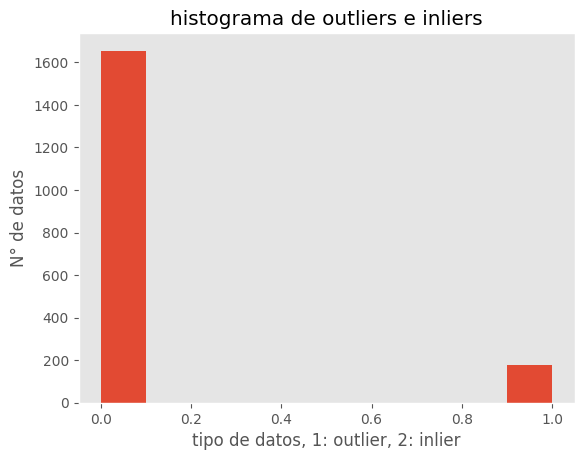

In [32]:
plt.hist(datos["y"],)
plt.grid()
plt.xlabel("tipo de datos, 1: outlier, 2: inlier")
plt.ylabel("N° de datos")
plt.title("histograma de outliers e inliers")
plt.show()

In [40]:
porcentaje = len(datos["y"][ datos["y"]== 1])/len(datos["y"])
print(porcentaje*100)

9.612233752048061


creacion del cluster local h2o

In [41]:
h2o.init(
    ip = "localhost", 
    nthreads= -1, 
    max_mem_size = "4g"
)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 39 mins
H2O_cluster_timezone:,America/Santiago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_usuario_6mmci2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [42]:
h2o.remove_all()
h2o.no_progress()

In [43]:
### se transfieren los datos al cluster de h2o
datos_h2o = h2o.H2OFrame(
    python_obj = datos, 
    destination_frame= "datos_h2o"
)

In [45]:
### division de las observaciones totales en conjunto de entrenamiento y testing
datos_train_h2o, datos_test_h2o = datos_h2o.split_frame(
    ratios = [0.8], 
    destination_frames= ["datos_train_H2O", "datos_test_H2O"], 
    seed = 123
)

In [47]:
datos_h2o

columna_0,columna_1,columna_2,columna_3,columna_4,columna_5,columna_6,columna_7,columna_8,columna_9,columna_10,columna_11,columna_12,columna_13,columna_14,columna_15,columna_16,columna_17,columna_18,columna_19,columna_20,y
0.00491231,0.693191,-0.20364,0.595322,0.35319,-0.0614006,-0.278295,-1.65044,0.759072,-0.420487,0.372149,1.48597,-0.798376,1.85473,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,0
0.110729,-0.0799026,-0.20364,1.26894,0.396246,-0.0614006,-0.278295,-1.71027,0.759072,-0.420487,0.882794,1.48597,-0.798376,1.85473,0.278625,0.963083,0.301464,0.129265,0.0935634,-0.256385,-0.493294,0
0.216546,-0.272445,-0.20364,1.05099,0.148753,-0.0614006,-0.278295,-1.71027,1.10651,-0.420487,2.51686,1.14178,-1.33293,0.314688,2.34266,-0.488279,0.061002,0.0654173,0.0245962,-0.256385,1.14002,0
0.00491231,0.727346,-0.20364,1.21217,-0.683598,-0.0614006,-0.278295,-1.71027,1.10651,-0.420487,1.98919,1.14178,-1.33293,0.314688,1.65465,-0.488279,0.061002,0.193113,0.0935634,-0.323186,1.14002,0
-0.100905,0.363595,1.32137,1.02712,0.141359,-0.0614006,-0.278295,-0.992364,-0.0516126,-0.420487,0.797687,-0.208514,-0.0856376,-0.565334,0.278625,-0.488279,-0.0592291,0.0654173,0.0245962,-0.456787,1.14002,0
-0.100905,1.37531,4.48491,0.480556,-0.191869,-0.0614006,-0.278295,-0.992364,0.0641995,-0.420487,-0.478926,0.34749,-0.691466,-0.345328,-0.753395,-0.488279,0.301464,0.256962,0.300465,-0.356586,1.14002,0
-0.206722,0.556293,8.39466,-0.177408,0.942922,-0.0614006,1.10442,-1.41114,0.990697,-0.420487,-0.0533886,0.877017,-0.834013,0.534694,0.966637,-0.488279,0.421696,-0.509216,-0.113338,1.84784,-0.493294,0
-0.206722,0.488735,7.81243,-0.174564,0.674478,-0.0614006,2.03072,-1.53079,0.990697,-0.420487,0.0827835,0.877017,-0.834013,0.534694,-0.409388,-0.488279,-0.119345,-0.381519,-0.251273,0.745625,-0.493294,0
-0.206722,0.61953,9.1022,-0.0388869,0.800571,-0.0614006,-0.278295,-1.23167,0.759072,-0.420487,0.457257,1.35359,-1.33293,0.7547,0.278625,-0.488279,0.421696,-0.317671,0.0935634,1.64743,1.14002,0
-0.206722,-0.200598,9.303,0.354112,0.703456,-0.0614006,2.07998,-1.29149,0.527448,-0.420487,0.099805,0.665206,-1.11911,-0.345328,0.622631,-0.488279,-0.17946,-0.573064,-0.527142,0.511822,1.14002,0


PROCESO DE ENTRENAMIENTO DE LA RED NEURONAL AUTOENCODER Y SU ARQUITECTURA

In [48]:

var_respuesta = "y"
predictores = datos_h2o.columns
predictores.remove(var_respuesta)

In [49]:
predictores

['columna_0',
 'columna_1',
 'columna_2',
 'columna_3',
 'columna_4',
 'columna_5',
 'columna_6',
 'columna_7',
 'columna_8',
 'columna_9',
 'columna_10',
 'columna_11',
 'columna_12',
 'columna_13',
 'columna_14',
 'columna_15',
 'columna_16',
 'columna_17',
 'columna_18',
 'columna_19',
 'columna_20']

In [82]:
autoencoder = H2OAutoEncoderEstimator(
    activation = "tanh", 
    standardize = True, 
    l1 = 0.01, 
    l2 = 0.01, 
    hidden = [15, 10, 5, 10, 15], 
    epochs = 150, 
    ignore_const_cols = False, score_each_iteration = True, 
    seed = 12345
)

In [51]:
datos_train_h2o

columna_0,columna_1,columna_2,columna_3,columna_4,columna_5,columna_6,columna_7,columna_8,columna_9,columna_10,columna_11,columna_12,columna_13,columna_14,columna_15,columna_16,columna_17,columna_18,columna_19,columna_20,y
0.00491231,0.693191,-0.20364,0.595322,0.35319,-0.0614006,-0.278295,-1.65044,0.759072,-0.420487,0.372149,1.48597,-0.798376,1.85473,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,0
0.110729,-0.0799026,-0.20364,1.26894,0.396246,-0.0614006,-0.278295,-1.71027,0.759072,-0.420487,0.882794,1.48597,-0.798376,1.85473,0.278625,0.963083,0.301464,0.129265,0.0935634,-0.256385,-0.493294,0
0.216546,-0.272445,-0.20364,1.05099,0.148753,-0.0614006,-0.278295,-1.71027,1.10651,-0.420487,2.51686,1.14178,-1.33293,0.314688,2.34266,-0.488279,0.061002,0.0654173,0.0245962,-0.256385,1.14002,0
0.00491231,0.727346,-0.20364,1.21217,-0.683598,-0.0614006,-0.278295,-1.71027,1.10651,-0.420487,1.98919,1.14178,-1.33293,0.314688,1.65465,-0.488279,0.061002,0.193113,0.0935634,-0.323186,1.14002,0
-0.100905,0.363595,1.32137,1.02712,0.141359,-0.0614006,-0.278295,-0.992364,-0.0516126,-0.420487,0.797687,-0.208514,-0.0856376,-0.565334,0.278625,-0.488279,-0.0592291,0.0654173,0.0245962,-0.456787,1.14002,0
-0.100905,1.37531,4.48491,0.480556,-0.191869,-0.0614006,-0.278295,-0.992364,0.0641995,-0.420487,-0.478926,0.34749,-0.691466,-0.345328,-0.753395,-0.488279,0.301464,0.256962,0.300465,-0.356586,1.14002,0
-0.206722,0.556293,8.39466,-0.177408,0.942922,-0.0614006,1.10442,-1.41114,0.990697,-0.420487,-0.0533886,0.877017,-0.834013,0.534694,0.966637,-0.488279,0.421696,-0.509216,-0.113338,1.84784,-0.493294,0
-0.206722,0.488735,7.81243,-0.174564,0.674478,-0.0614006,2.03072,-1.53079,0.990697,-0.420487,0.0827835,0.877017,-0.834013,0.534694,-0.409388,-0.488279,-0.119345,-0.381519,-0.251273,0.745625,-0.493294,0
-0.206722,0.358188,9.68935,0.131978,0.685538,-0.0614006,1.11839,-0.932539,0.295824,-0.420487,-0.0704101,1.0094,-0.905287,0.699698,0.622631,0.963083,-0.17946,-0.253823,-0.251273,0.211219,-0.493294,0
-0.418356,0.26532,8.75644,-0.542935,0.33213,-0.0614006,2.31213,-1.11202,0.295824,-0.420487,-0.257647,1.77721,-1.19038,1.85473,1.65465,-0.488279,-0.419923,-0.509216,-0.32024,0.445022,-0.493294,0


In [53]:
datos_test_h2o.describe()

Rows:371
Cols:22

,columna_0,columna_1,columna_2,columna_3,columna_4,columna_5,columna_6,columna_7,columna_8,columna_9,columna_10,columna_11,columna_12,columna_13,columna_14,columna_15,columna_16,columna_17,columna_18,columna_19,columna_20,y
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,-2.746330647550977,-0.9199884374438398,-0.20364048566636067,-1.635871141309735,-0.6835984744007735,-0.06140064449540183,-0.27829494600614724,-1.9495717445965983,-1.441358488528391,-0.4204873479150621,-1.398087924648133,-1.8765244994087824,-1.4398413651943174,-2.325378561577513,-1.441407750185039,-0.4882788851854229,-4.567897329062897,-3.6377717938621887,-3.9755045724961047,-0.6905897475230182,-2.1266054668088588,0.0
mean,0.0017748822976443573,-0.033482428888079944,0.12729391403967522,-0.01568684947968431,-0.10519852842963252,-0.0075952872181393235,0.04106088876572439,0.005318055947196541,-0.06222613910948499,0.08917838776635788,0.04406068984124182,-0.07349168144801399,0.06286560985267978,-0.05564436102998155,-0.07372706510255693,-0.0423079886076668,0.018872528617080338,0.039430576884881316,0.012884765757493807,-0.051752100880690204,-0.03103599848673179,0.1078167115902965
maxs,2.8619723138826965,3.9562123951714145,9.929344871973717,3.391185964983803,3.988334622336864,19.90038690536899,6.88829147500716,2.3578617580121497,6.318055909277345,5.181138364528194,5.716903416865029,2.7038853701806103,2.302037323948854,4.0547834929465605,3.718689207431241,5.31716682114256,3.006665279730272,2.5554926661029356,2.7832863648250017,7.35889063916486,1.1400175279285745,1.0
sigma,1.0061671934006744,0.991921761000342,1.4667517695558878,0.9885714293958067,0.8911501183367657,1.0363643717405882,1.1285614022037211,0.9809600808662242,1.024717545581713,1.100852035845705,0.9934513354576474,1.0244390327655473,1.0023606041252875,0.9865860545183074,0.9545426198331602,0.9392885363154122,1.0001798308444514,1.0214590670105996,1.0276533852380119,0.9712721973834739,0.9802922465069505,0.3105676212930827
zeros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,331
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-0.20672175935459663,0.6195296400657914,9.102202747345364,-0.03888693269325105,0.8005707366197339,-0.06140064449540183,-0.27829494600614724,-1.2316661608284738,0.7590724601030867,-0.4204873479150621,0.457256707468936,1.353591131168708,-1.3329305455045126,0.7546996716410053,0.2786245690203875,-0.4882788851854229,0.42169550053895216,-0.31767125862315304,0.09356344078905118,1.6474336013074862,1.1400175279285745,0.0
1,-0.20672175935459663,-0.2005977079478956,9.302999354793023,0.35411203673083136,0.7034558311589688,-0.06140064449540183,2.0799842948600027,-1.2914916261424845,0.5274481497208258,-0.4204873479150621,0.09980498935463836,0.6652058328489151,-1.1191089061249029,-0.3453282687941798,0.6226310328614728,-0.4882788851854229,-0.1794602620636803,-0.5730636074876942,-0.5271418493730913,0.5118222604469554,1.1400175279285745,0.0
2,0.004912314661768384,-0.9199884374438398,2.1554548613618616,-0.1497257598219116,3.920269221621993,-0.06140064449540183,-0.27829494600614724,-1.3513170914564947,6.318055909277345,-0.4204873479150621,-0.32573277030523995,1.9890237142331328,-1.4398413651943174,1.9097290090979495,1.9986568882258144,-0.4882788851854229,-0.7806160246663127,-1.3392406540813178,-1.492683411847535,1.5138322670886002,-0.49329396944014214,0.0


In [83]:
autoencoder.train(
    x = predictores, 
    training_frame= datos_train_h2o, 
    validation_frame= datos_test_h2o, 
    max_runtime_secs= None, 
    ignored_columns= None, 
    verbose = True

)


Scoring History for Model DeepLearning_model_python_1676480167450_7 at 2023-02-15 16:55:51.882520
Model Build is 87% done...
                timestamp    duration training_speed  epochs  iterations  \
12    2023-02-15 16:55:49   1.938 sec  95217 obs/sec   120.0          12   
13    2023-02-15 16:55:49   2.110 sec  94569 obs/sec   130.0          13   
14    2023-02-15 16:55:49   2.278 sec  94193 obs/sec   140.0          14   
15    2023-02-15 16:55:49   2.433 sec  94396 obs/sec   150.0          15   
16    2023-02-15 16:55:49   2.439 sec  94315 obs/sec   150.0          15   

     samples  training_rmse  training_mse  validation_rmse  validation_mse  
12  175200.0       0.155607      0.024214         0.156280        0.024423  
13  189800.0       0.163374      0.026691         0.162555        0.026424  
14  204400.0       0.161422      0.026057         0.161660        0.026134  
15  219000.0       0.155859      0.024292         0.155596        0.024210  
16  219000.0       0.156116     

Model Details
=============
H2OAutoEncoderEstimator : Deep Learning
Model Key: DeepLearning_model_python_1676480167450_7


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 1.106 weights/biases, 22,5 KB, 219.000 training samples, mini-batch size 1
    layer    units    type    dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight            weight_rms            mean_bias               bias_rms
--  -------  -------  ------  ---------  ----  ----  --------------------  ---------------------  ----------  ---------------------  --------------------  ----------------------  ---------------------
    1        21       Input   0.0
    2        15       Tanh    0.0        0.01  0.01  0.06070713123070106   0.01287565752863884    0.0         0.0003792295500846064  0.03667403757572174   -0.0015180310089875986  0.005766177549958229
    3        10       Tanh    0.0        0.01  0.01  0.06307184968764583   0.003923293203115463   0.0         -0.007052033608003209  0.08906683325767517   0.0017224773160670792   0.0053203050047159195
    4        5        Tanh    0.0        0.01  0.01  0.06329335181042552   0.009332146495580673   0.0         0.022591845713104703   0.1583743691444397    0.0015519693726713407   0.0031977826729416847
    5        10       Tanh    0.0        0.01  0.01  0.06241147231310606   0.0068834275007247925  0.0         0.02429915482425713    0.1741960644721985    0.00036396801299957846  0.0013975673355162144
    6        15       Tanh    0.0        0.01  0.01  0.06307160184408228   0.003952058032155037   0.0         -0.008995240157770847  0.10885217785835266   6.231721943995108e-05   0.0003595381276682019
    7        21       Tanh               0.01  0.01  0.060562918327807906  0.014700155705213547   0.0         0.003086987833809857   0.056591182947158813  0.010182032737845919    0.04954361915588379

ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.024372240464834223
RMSE: 0.15611611212438717

ModelMetricsAutoEncoder: deeplearning
** Reported on validation data. **

MSE: 0.024156529432319936
RMSE: 0.15542370936353286

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_mse    validation_rmse    validation_mse
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  --------------  -----------------  ----------------
    2023-02-15 16:55:47  0.047 sec   0,00000 obs/sec   0         0             0          0.201422         0.0405709       0.203594           0.0414504
    2023-02-15 16:55:47  0.183 sec   110606 obs/sec    10        1             14600      0.157487         0.0248021       0.157687           0.0248651
    2023-02-15 16:55:47  0.339 sec   103180 obs/sec    20        2             29200      0.159347         0.0253914       0.16167            0.0261371
    2023-02-15 16:55:47  0.499 sec   100000 obs/sec    30        3             43800      0.162705         0.026473        0.163772           0.0268211
    2023-02-15 16:55:48  0.658 sec   98482 obs/sec     40        4             58400      0.163873         0.0268544       0.166256           0.0276412
    2023-02-15 16:55:48  0.818 sec   97333 obs/sec     50        5             73000      0.161505         0.0260837       0.16488            0.0271856
    2023-02-15 16:55:48  0.973 sec   97225 obs/sec     60        6             87600      0.164639         0.0271059       0.166826           0.0278309
    2023-02-15 16:55:48  1.130 sec   97056 obs/sec     70        7             102200     0.160715         0.0258294       0.164339           0.0270072
    2023-02-15 16:55:48  1.290 sec   96608 obs/sec     80        8             116800     0.167941         0.0282041       0.167514           0.0280608
    2023-02-15 16:55:48  1.453 sec   96052 obs/sec     90        9             131400     0.157746         0.0248838       0.1571             0.02

DIAGNOSTICO PARA IDENTIFICAR EL NUMERO DE EPOCAS OPTIMAS, Y LA VISUALIZACION DEL RMSE DE TRAINING Y VALIDACION

Text(0.5, 1.0, 'Evolución del error de entrenamiento y validación')

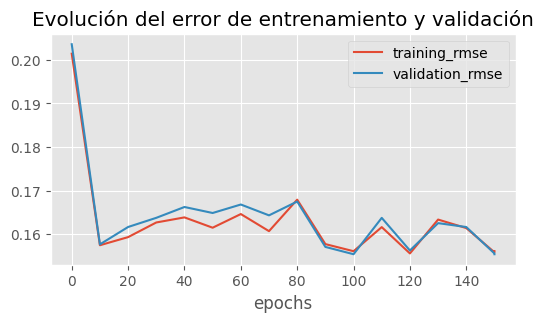

In [84]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3))
autoencoder.scoring_history().plot(x =  "epochs", 
                                   y = "training_rmse", 
                                   ax = ax)
autoencoder.scoring_history().plot(x = "epochs", 
                                   y = "validation_rmse", 
                                   ax = ax)
ax.set_title("Evolución del error de entrenamiento y validación")


REENTRENAMIENTO DEL MODELO USANDO EL NUMERO OPTIMO DE EPOCAS DE ENTRENAMIENTO, PERO ESTA VES USANDO TODOS LOS DATOS

In [86]:
autoencoder = H2OAutoEncoderEstimator(
    activation = "tanh", 
    standardize = True, 
    l1 = 0.01, 
    l2 = 0.01, 
    hidden = [15, 10, 5, 10, 15], 
    epochs = 150, 
    ignore_const_cols = False, 
    score_each_iteration = True, 
    seed = 12345
)

In [87]:
autoencoder.train(
    x = predictores, 
    training_frame = datos_h2o, 
    verbose = True
)


Scoring History for Model DeepLearning_model_python_1676480167450_8 at 2023-02-15 17:00:46.666411
Model Build is 67% done...
                timestamp    duration training_speed  epochs  iterations  \
12    2023-02-15 17:00:44   2.638 sec  86503 obs/sec   120.0          12   
13    2023-02-15 17:00:44   2.829 sec  87222 obs/sec   130.0          13   
14    2023-02-15 17:00:45   3.023 sec  87757 obs/sec   140.0          14   
15    2023-02-15 17:00:45   3.211 sec  88425 obs/sec   150.0          15   
16    2023-02-15 17:00:45   3.214 sec  88397 obs/sec   150.0          15   

     samples  training_rmse  training_mse  
12  219720.0       0.146537      0.021473  
13  238030.0       0.138113      0.019075  
14  256340.0       0.144077      0.020758  
15  274650.0       0.142611      0.020338  
16  274650.0       0.136958      0.018757  




Model Details
=============
H2OAutoEncoderEstimator : Deep Learning
Model Key: DeepLearning_model_python_1676480167450_8


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 1.106 weights/biases, 21,3 KB, 274.650 training samples, mini-batch size 1
    layer    units    type    dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight             weight_rms           mean_bias                bias_rms
--  -------  -------  ------  ---------  ----  ----  --------------------  --------------------  ----------  ----------------------  -------------------  -----------------------  ---------------------
    1        21       Input   0.0
    2        15       Tanh    0.0        0.01  0.01  0.05809070924592633   0.01609816402196884   0.0         -0.0024929036948542994  0.05923748016357422  -0.0013037707521034502   0.006002126261591911
    3        10       Tanh    0.0        0.01  0.01  0.06214494090527296   0.007530465722084045  0.0         -0.013559407149314211   0.11505067348480225  -0.00016811253557436027  0.0013210782781243324
    4        5        Tanh    0.0        0.01  0.01  0.059390567280352115  0.013511031866073608  0.0         -0.04314426766832184    0.2107222080230713   0.0006578387099327963    0.0014687413349747658
    5        10       Tanh    0.0        0.01  0.01  0.059626078605651854  0.012916471809148788  0.0         -0.045858933954878014   0.22240334749221802  -0.00046933330034126537  0.0007285140454769135
    6        15       Tanh    0.0        0.01  0.01  0.06203864928334951   0.008044537156820297  0.0         0.0010501184600889247   0.1420627236366272   0.000149212912138884     0.0011521917767822742
    7        21       Tanh               0.01  0.01  0.05692776016565779   0.019351191818714142  0.0         -0.006538986398248068   0.07912102341651917  0.0016949463136145897    0.04243744909763336

ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.018757363723862885
RMSE: 0.13695752525459448

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_mse
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  --------------
    2023-02-15 17:00:42  0.038 sec   0,00000 obs/sec   0         0             0          0.199897         0.0399589
    2023-02-15 17:00:42  0.216 sec   105229 obs/sec    10        1             18310      0.142143         0.0202047
    2023-02-15 17:00:42  0.412 sec   100328 obs/sec    20        2             36620      0.144661         0.0209269
    2023-02-15 17:00:42  0.620 sec   96368 obs/sec     30        3             54930      0.151047         0.0228153
    2023-02-15 17:00:42  0.820 sec   95488 obs/sec     40        4             73240      0.14738          0.0217208
    2023-02-15 17:00:43  1.026 sec   94478 obs/sec     50        5             91550      0.14346          0.0205807
    2023-02-15 17:00:43  1.233 sec   94219 obs/sec     60        6             109860     0.147292         0.021695
    2023-02-15 17:00:43  1.528 sec   88821 obs/sec     70        7             128170     0.136958         0.0187574
    2023-02-15 17:00:43  1.818 sec   84670 obs/sec     80        8             146480     0.147868         0.021865
    2023-02-15 17:00:44  2.032 sec   84899 obs/sec     90        9             164790     0.139326         0.0194117
    2023-02-15 17:00:44  2.235 sec   85520 obs/sec     100       10            183100     0.141593         0.0200485
    2023-02-15 17:00:44  2.439 sec   85962 obs/sec     110       11            201410     0.147581         0.02178
    2023-02-15 17:00:44  2.638 sec   86503 obs/sec     120       12            219720     0.146537         0.0214731
    2023-02-15 17:00:44  2.829 sec   87222 obs/sec     130       13            238030     0.138113         0.0190753
    2023-02-15 17:00:45  3.023 sec   87757 obs/sec     140       14            25

CALCULO DEL ERROR EN LA RECONSTRUCCIÓN Y DETECCIÓN DE ANOMALÍAS

In [95]:
error_reconstruccion = autoencoder.anomaly(test_data = datos_h2o)
error_reconstruccion = error_reconstruccion.as_data_frame()
error_reconstrucion = error_reconstruccion["Reconstruction.MSE"]

In [96]:
(error_reconstruccion)*100

,Reconstruction.MSE
0,0.253043
1,0.586148
2,1.201651
3,0.914745
4,0.621851
...,...
1826,4.353243
1827,4.748796
1828,4.214953
1829,3.802209


In [97]:
datos["y"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1826    1.0
1827    1.0
1828    1.0
1829    1.0
1830    1.0
Name: y, Length: 1831, dtype: float64

DISTRIBUCIÓN DEL ERROR DE RECONSTRUCIÓN EN ANOMALÍAS Y NO ANOMALÍAS

In [100]:
datos_y["y"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1826    1.0
1827    1.0
1828    1.0
1829    1.0
1830    1.0
Name: y, Length: 1831, dtype: float64

In [101]:
error_reconstruccion

,Reconstruction.MSE
0,0.002530
1,0.005861
2,0.012017
3,0.009147
4,0.006219
...,...
1826,0.043532
1827,0.047488
1828,0.042150
1829,0.038022


In [102]:
df_resultados = pd.DataFrame({"error_reconstruccion": error_reconstruccion["Reconstruction.MSE"], "anomalia": datos_y["y"].astype(str)})


In [103]:
df_resultados

,error_reconstruccion,anomalia
0,0.002530,0.0
1,0.005861,0.0
2,0.012017,0.0
3,0.009147,0.0
4,0.006219,0.0
...,...,...
1826,0.043532,1.0
1827,0.047488,1.0
1828,0.042150,1.0
1829,0.038022,1.0


Text(0, 0.5, 'clasificacion (0 = normal, 1 = anomalía)')

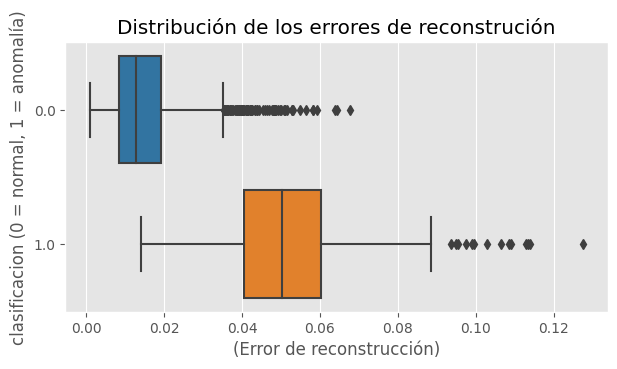

In [111]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 3.5))
sns.boxplot(
    x = "error_reconstruccion", 
    y = "anomalia", 
    data = df_resultados, 
    palette = "tab10", 
    ax = ax
)
ax.set_xscale("linear")
ax.set_title("Distribución de los errores de reconstrución")
ax.set_xlabel("(Error de reconstrucción)")
ax.set_ylabel("clasificacion (0 = normal, 1 = anomalía)")


MATRIZ DE CONFUSION PARA LOS DATOS USANDO EL AUTOENCODER

In [113]:
df_resultados = df_resultados.sort_values("error_reconstruccion", ascending= False).reset_index(drop = True)


In [114]:
df_resultados

,error_reconstruccion,anomalia
0,0.127581,1.0
1,0.114033,1.0
2,0.113522,1.0
3,0.113016,1.0
4,0.109099,1.0
...,...,...
1826,0.001562,0.0
1827,0.001527,0.0
1828,0.001524,0.0
1829,0.001092,0.0


In [115]:
df_resultados["clasificacion"] = np.where(df_resultados.index <=176, 1, 0)

In [120]:
df_resultados

,error_reconstruccion,anomalia,clasificacion
0,0.127581,1.0,1
1,0.114033,1.0,1
2,0.113522,1.0,1
3,0.113016,1.0,1
4,0.109099,1.0,1
...,...,...,...
1826,0.001562,0.0,0
1827,0.001527,0.0,0
1828,0.001524,0.0,0
1829,0.001092,0.0,0


In [118]:
df_resultados.to_excel("resultados usando el primer modelo.xlsx")

In [119]:
pd.crosstab(
    df_resultados.anomalia, 
    df_resultados.clasificacion
)

clasificacion,0,1
anomalia,,
0.0,1609,46
1.0,45,131


In [121]:
131/176

0.7443181818181818

REENTRENAMIENTO ITERATIVO DEL AUTOENCODER, eliminado todas las observaciones que posean un error de reconstruccion superior al cuantil 0.8 (80%)

In [147]:
anexo = pd.DataFrame({"error_reconstruccion": error_reconstruccion["Reconstruction.MSE"]})

In [148]:
anexo

,error_reconstruccion
0,0.002530
1,0.005861
2,0.012017
3,0.009147
4,0.006219
...,...
1826,0.043532
1827,0.047488
1828,0.042150
1829,0.038022


In [149]:
datos

,columna_0,columna_1,columna_2,columna_3,columna_4,columna_5,columna_6,columna_7,columna_8,columna_9,...,columna_12,columna_13,columna_14,columna_15,columna_16,columna_17,columna_18,columna_19,columna_20,y
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,0.0
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294,0.0
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018,0.0
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018,0.0
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,-0.418356,-0.919988,-0.161178,0.829564,0.953023,-0.061401,3.060819,1.221178,1.338133,-0.420487,...,-0.976561,1.524719,0.622631,-0.488279,-1.982928,-2.616202,-1.561651,0.244620,-0.493294,1.0
1827,-0.418356,-0.919988,-0.171055,0.796630,0.823510,-0.061401,3.565299,1.281003,1.453945,-0.420487,...,-0.976561,1.524719,-0.065382,-0.488279,-1.862696,-2.807747,-1.699585,0.010817,-0.493294,1.0
1828,-0.418356,-0.919988,-0.164635,0.952396,1.120470,-0.061401,2.788995,1.221178,1.222321,-0.420487,...,-0.976561,1.524719,0.622631,-0.488279,-1.922812,-2.488506,-1.492683,0.244620,-0.493294,1.0
1829,-0.418356,-0.919988,-0.150934,0.695726,1.212428,-0.061401,2.484822,1.221178,1.222321,-0.420487,...,-0.976561,1.524719,0.278625,-0.488279,-1.321656,-2.296962,-1.423716,0.144419,-0.493294,1.0


In [150]:
data = datos.copy()

In [151]:
data2 = pd.concat((data, anexo), axis = 1)

In [152]:
data2

,columna_0,columna_1,columna_2,columna_3,columna_4,columna_5,columna_6,columna_7,columna_8,columna_9,...,columna_13,columna_14,columna_15,columna_16,columna_17,columna_18,columna_19,columna_20,y,error_reconstruccion
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,0.0,0.002530
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294,0.0,0.005861
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018,0.0,0.012017
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018,0.0,0.009147
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018,0.0,0.006219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,-0.418356,-0.919988,-0.161178,0.829564,0.953023,-0.061401,3.060819,1.221178,1.338133,-0.420487,...,1.524719,0.622631,-0.488279,-1.982928,-2.616202,-1.561651,0.244620,-0.493294,1.0,0.043532
1827,-0.418356,-0.919988,-0.171055,0.796630,0.823510,-0.061401,3.565299,1.281003,1.453945,-0.420487,...,1.524719,-0.065382,-0.488279,-1.862696,-2.807747,-1.699585,0.010817,-0.493294,1.0,0.047488
1828,-0.418356,-0.919988,-0.164635,0.952396,1.120470,-0.061401,2.788995,1.221178,1.222321,-0.420487,...,1.524719,0.622631,-0.488279,-1.922812,-2.488506,-1.492683,0.244620,-0.493294,1.0,0.042150
1829,-0.418356,-0.919988,-0.150934,0.695726,1.212428,-0.061401,2.484822,1.221178,1.222321,-0.420487,...,1.524719,0.278625,-0.488279,-1.321656,-2.296962,-1.423716,0.144419,-0.493294,1.0,0.038022


In [158]:
error_reconstruccion

,Reconstruction.MSE
0,0.002530
1,0.005861
2,0.012017
3,0.009147
4,0.006219
...,...
1826,0.043532
1827,0.047488
1828,0.042150
1829,0.038022


In [160]:
data2

,columna_0,columna_1,columna_2,columna_3,columna_4,columna_5,columna_6,columna_7,columna_8,columna_9,...,columna_13,columna_14,columna_15,columna_16,columna_17,columna_18,columna_19,columna_20,y,error_reconstruccion
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,0.0,0.002530
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294,0.0,0.005861
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018,0.0,0.012017
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018,0.0,0.009147
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018,0.0,0.006219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,-0.418356,-0.919988,-0.161178,0.829564,0.953023,-0.061401,3.060819,1.221178,1.338133,-0.420487,...,1.524719,0.622631,-0.488279,-1.982928,-2.616202,-1.561651,0.244620,-0.493294,1.0,0.043532
1827,-0.418356,-0.919988,-0.171055,0.796630,0.823510,-0.061401,3.565299,1.281003,1.453945,-0.420487,...,1.524719,-0.065382,-0.488279,-1.862696,-2.807747,-1.699585,0.010817,-0.493294,1.0,0.047488
1828,-0.418356,-0.919988,-0.164635,0.952396,1.120470,-0.061401,2.788995,1.221178,1.222321,-0.420487,...,1.524719,0.622631,-0.488279,-1.922812,-2.488506,-1.492683,0.244620,-0.493294,1.0,0.042150
1829,-0.418356,-0.919988,-0.150934,0.695726,1.212428,-0.061401,2.484822,1.221178,1.222321,-0.420487,...,1.524719,0.278625,-0.488279,-1.321656,-2.296962,-1.423716,0.144419,-0.493294,1.0,0.038022


In [161]:
cuantil = np.quantile(a=error_reconstruccion,  q=0.8)
datos_trimmed = data2[data2["error_reconstruccion"] < cuantil].copy()

datos_trimmed_h2o = h2o.H2OFrame(
                        python_obj = datos_trimmed,
                        destination_frame = 'datos_trimmed_h2o'
                    )

In [162]:
datos_trimmed_h2o

columna_0,columna_1,columna_2,columna_3,columna_4,columna_5,columna_6,columna_7,columna_8,columna_9,columna_10,columna_11,columna_12,columna_13,columna_14,columna_15,columna_16,columna_17,columna_18,columna_19,columna_20,y,error_reconstruccion
0.00491231,0.693191,-0.20364,0.595322,0.35319,-0.0614006,-0.278295,-1.65044,0.759072,-0.420487,0.372149,1.48597,-0.798376,1.85473,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,0,0.00253043
0.110729,-0.0799026,-0.20364,1.26894,0.396246,-0.0614006,-0.278295,-1.71027,0.759072,-0.420487,0.882794,1.48597,-0.798376,1.85473,0.278625,0.963083,0.301464,0.129265,0.0935634,-0.256385,-0.493294,0,0.00586148
0.216546,-0.272445,-0.20364,1.05099,0.148753,-0.0614006,-0.278295,-1.71027,1.10651,-0.420487,2.51686,1.14178,-1.33293,0.314688,2.34266,-0.488279,0.061002,0.0654173,0.0245962,-0.256385,1.14002,0,0.0120165
0.00491231,0.727346,-0.20364,1.21217,-0.683598,-0.0614006,-0.278295,-1.71027,1.10651,-0.420487,1.98919,1.14178,-1.33293,0.314688,1.65465,-0.488279,0.061002,0.193113,0.0935634,-0.323186,1.14002,0,0.00914745
-0.100905,0.363595,1.32137,1.02712,0.141359,-0.0614006,-0.278295,-0.992364,-0.0516126,-0.420487,0.797687,-0.208514,-0.0856376,-0.565334,0.278625,-0.488279,-0.0592291,0.0654173,0.0245962,-0.456787,1.14002,0,0.00621851
-0.100905,1.37531,4.48491,0.480556,-0.191869,-0.0614006,-0.278295,-0.992364,0.0641995,-0.420487,-0.478926,0.34749,-0.691466,-0.345328,-0.753395,-0.488279,0.301464,0.256962,0.300465,-0.356586,1.14002,0,0.0151229
0.00491231,-0.919988,1.66517,-1.15147,2.46769,-0.0614006,-0.278295,-0.932539,1.68557,-0.420487,1.17216,1.85664,-1.43984,1.63472,2.34266,0.963083,-0.17946,-0.573064,-0.458175,0.478422,-0.493294,0,0.0233807
-1.26489,0.978087,1.95912,-1.34418,-0.412512,-0.0614006,-0.278295,-0.992364,2.26463,-0.420487,2.29558,1.38007,-1.26166,0.919704,3.03068,-0.488279,-0.900847,-0.573064,-0.734044,0.144419,-0.493294,0,0.0198688
-1.26489,1.38228,1.5879,-1.10516,-0.190377,-0.0614006,-0.278295,-0.992364,2.03301,-0.420487,0.712579,1.43302,-1.33293,0.919704,1.65465,0.963083,-0.419923,-0.509216,-0.665076,0.144419,-0.493294,0,0.0106125
-1.26489,0.612532,2.09627,0.907689,-0.683598,-0.0614006,-0.278295,-1.05219,2.61207,-0.420487,2.72112,1.85664,-1.4042,1.68972,2.34266,-0.488279,-0.660385,-0.573064,-0.734044,0.111018,-0.493294,0,0.0170681


ENTRENAMIENTO DEL MODELO CON LA NUEVA BASE DE DATOS FILTRADA USANDO EL 80% DE LAS ANOMALIAS

In [163]:
autoencoder.train(
    x = predictores, 
    training_frame= datos_trimmed_h2o, 
    verbose = True
)


Scoring History for Model DeepLearning_model_python_1676480167450_9 at 2023-02-15 17:48:08.605990
Model Build is 80% done...
                timestamp    duration training_speed  epochs  iterations  \
9     2023-02-15 17:48:05   1.684 sec  84407 obs/sec    90.0           9   
10    2023-02-15 17:48:06   1.851 sec  84869 obs/sec   100.0          10   
11    2023-02-15 17:48:06   2.032 sec  84668 obs/sec   110.0          11   
12    2023-02-15 17:48:06   2.192 sec  85364 obs/sec   120.0          12   
13    2023-02-15 17:48:06   2.236 sec  83816 obs/sec   120.0          12   

     samples  training_rmse  training_mse  
9   131760.0       0.146544      0.021475  
10  146400.0       0.156663      0.024543  
11  161040.0       0.146907      0.021582  
12  175680.0       0.161294      0.026016  
13  175680.0       0.142091      0.020190  




Model Details
=============
H2OAutoEncoderEstimator : Deep Learning
Model Key: DeepLearning_model_python_1676480167450_9


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 1.106 weights/biases, 21,3 KB, 175.680 training samples, mini-batch size 1
    layer    units    type    dropout    l1    l2    mean_rate            rate_rms              momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  ------  ---------  ----  ----  -------------------  --------------------  ----------  ----------------------  -------------------  ----------------------  ---------------------
    1        21       Input   0.0
    2        15       Tanh    0.0        0.01  0.01  0.10284961253286354  0.2032492756843567    0.0         -0.0027132849087513657  0.07014304399490356  0.0004777262606110924   0.0010705194436013699
    3        10       Tanh    0.0        0.01  0.01  0.06206901945794622  0.00783073902130127   0.0         0.013945343419860971    0.11808863282203674  0.0007376895709600563   0.0017810426652431488
    4        5        Tanh    0.0        0.01  0.01  0.05939152181148529  0.013508740812540054  0.0         0.000859606713274843    0.21816521883010864  0.0007578724351138054   0.003315265290439129
    5        10       Tanh    0.0        0.01  0.01  0.05938496988266707  0.013529978692531586  0.0         0.0018266891936946194   0.2314894199371338   0.0006749634046098218   0.0017727799713611603
    6        15       Tanh    0.0        0.01  0.01  0.06199195716530084  0.008342292159795761  0.0         -0.017248349895720216   0.14683115482330322  -0.0005218288629623045  0.0016706897877156734
    7        21       Tanh               0.01  0.01  0.05782177887176947  0.017848730087280273  0.0         -0.00459022727989375    0.07970553636550903  -0.0034424142585342     0.02505086362361908

ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.020189790990698488
RMSE: 0.1420907843271283

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_mse
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  --------------
    2023-02-15 17:48:04  0.085 sec   0,00000 obs/sec   0         0             0          0.211677         0.044807
    2023-02-15 17:48:04  0.252 sec   89268 obs/sec     10        1             14640      0.150426         0.022628
    2023-02-15 17:48:04  0.426 sec   87664 obs/sec     20        2             29280      0.149756         0.0224269
    2023-02-15 17:48:04  0.606 sec   86627 obs/sec     30        3             43920      0.143299         0.0205345
    2023-02-15 17:48:05  0.785 sec   86117 obs/sec     40        4             58560      0.145382         0.0211359
    2023-02-15 17:48:05  0.959 sec   86117 obs/sec     50        5             73200      0.144573         0.0209013
    2023-02-15 17:48:05  1.124 sec   86712 obs/sec     60        6             87840      0.142091         0.0201898
    2023-02-15 17:48:05  1.305 sec   86117 obs/sec     70        7             102480     0.142492         0.0203039
    2023-02-15 17:48:05  1.492 sec   85240 obs/sec     80        8             117120     0.145855         0.0212736
    2023-02-15 17:48:05  1.684 sec   84407 obs/sec     90        9             131760     0.146544         0.0214751
    2023-02-15 17:48:06  1.851 sec   84869 obs/sec     100       10            146400     0.156663         0.0245431
    2023-02-15 17:48:06  2.032 sec   84668 obs/sec     110       11            161040     0.146907         0.0215818
    2023-02-15 17:48:06  2.192 sec   85364 obs/sec     120       12            175680     0.161294         0.0260158
    2023-02-15 17:48:06  2.236 sec   83816 obs/sec     120       12            175680     0.142091         0.0201898

Variable Importances: 
variable    relative_importance    scaled_importance      percentage
---

In [164]:
# Error de recostrucción
# ==============================================================================
error_reconstruccion = autoencoder.anomaly(test_data = datos_h2o)
error_reconstruccion = error_reconstruccion.as_data_frame()
error_reconstruccion = error_reconstruccion['Reconstruction.MSE']

In [165]:
# Matriz de confusión de la clasificación final
# ==============================================================================
df_resultados = pd.DataFrame({
                    'error_reconstruccion' : error_reconstruccion,
                    'anomalia'             : datos_y['y']
                })

df_resultados = df_resultados \
                .sort_values('error_reconstruccion', ascending=False) \
                .reset_index(drop=True)

df_resultados['clasificacion'] = np.where(df_resultados.index <= 176, 1, 0)

pd.crosstab(
    df_resultados.anomalia,
    df_resultados.clasificacion
)

clasificacion,0,1
anomalia,,
0.0,1597,58
1.0,57,119


In [156]:
cuantil = np.quantile(a = error_reconstruccion, 
                      q = 0.8)
datos_trimmed = data2.loc[error_reconstruccion < cuantil, :]


ValueError: Cannot index with multidimensional key

In [125]:
type(datos)

pandas.core.frame.DataFrame

In [57]:
autoencoder.scoring_history_plot()

TypeError: scoring_history_plot() missing 2 required positional arguments: 'timestep' and 'metric'

In [5]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

In [4]:
h2o.init(
    ip = "localhost", 
    nthreads= -1, 
    max_mem_size= "4g"
)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.6+9-LTS-190, mixed mode, sharing)
  Starting server from C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\usuario\AppData\Local\Temp\tmpwl5tmppo
  JVM stdout: C:\Users\usuario\AppData\Local\Temp\tmpwl5tmppo\h2o_usuario_started_from_python.out
  JVM stderr: C:\Users\usuario\AppData\Local\Temp\tmpwl5tmppo\h2o_usuario_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Santiago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_usuario_6mmci2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"
